In [1]:
from tools import *

In [2]:
# People and Places
t1_start = '2015-01-01'
t1_ends = '2015-12-31'

t2_start = '2020-01-01'
t2_ends = '2020-12-31'

t3_start = '2016-01-01'
t3_ends = '2016-12-31'
mask_source = "CGIAR/SRTM90_V4"
source = "projects/sat-io/open-datasets/ORNL/LANDSCAN_GLOBAL"

# ROI - Region of Interest
lon, lat = -73.9, 40.74 # New York City
width, height = 0.15, 0.16
region = ee.Geometry.Rectangle([lon+width, lat+height, lon-width, lat-height])
mask = ee.Image(mask_source).select('elevation').gt(0)
mask


/home/map10194/Documents/monitoring_cities/tools.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


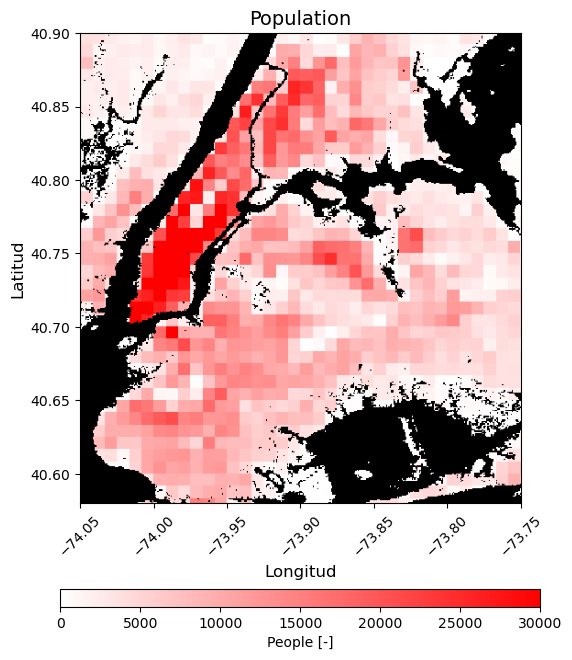

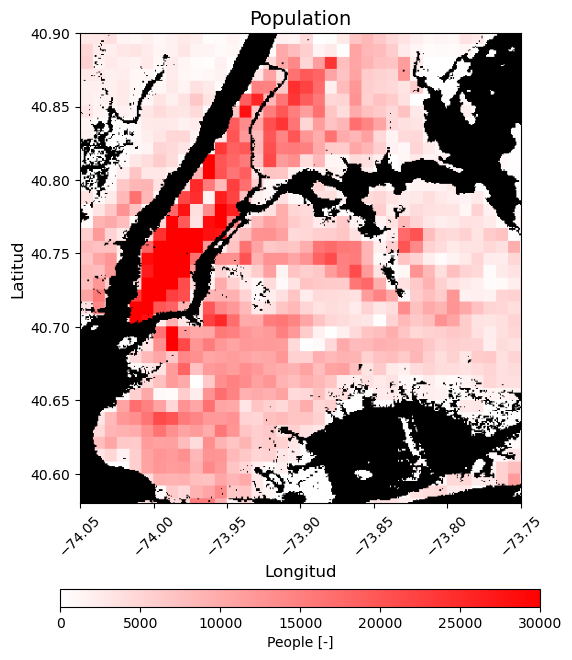

In [3]:
landScan = Collection(
    source=source,
    start_date=t1_start,
    end_date=t2_ends,
    boundaries=region,
    mask=mask,
)
landScan.get_event(t1_start, t1_ends, 'landScan_t1')
landScan.get_event(t2_start, t2_ends, 'landScan_t2')
landScan.set_viz_params({'min': 0, 'max': 30000, 'unit': '-','value': 'People',
                   'palette': ['white', 'red']})

landScan.plot_event('landScan_t1','Population', legend_label=True)
landScan.plot_event('landScan_t2','Population', legend_label=True)


In [4]:
Landscan_projection = landScan.collection.first().projection()

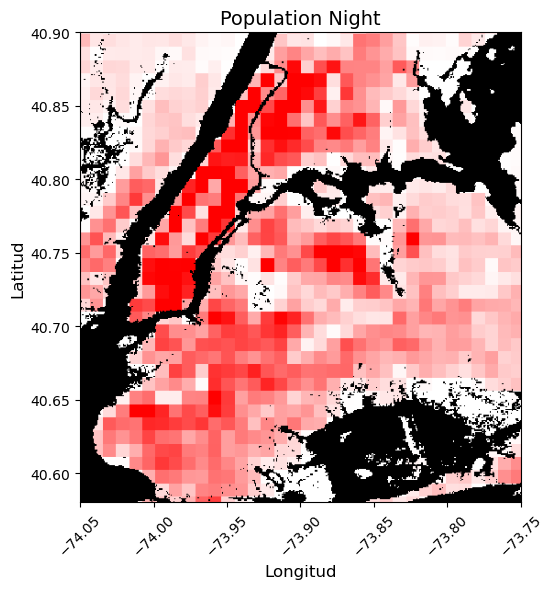

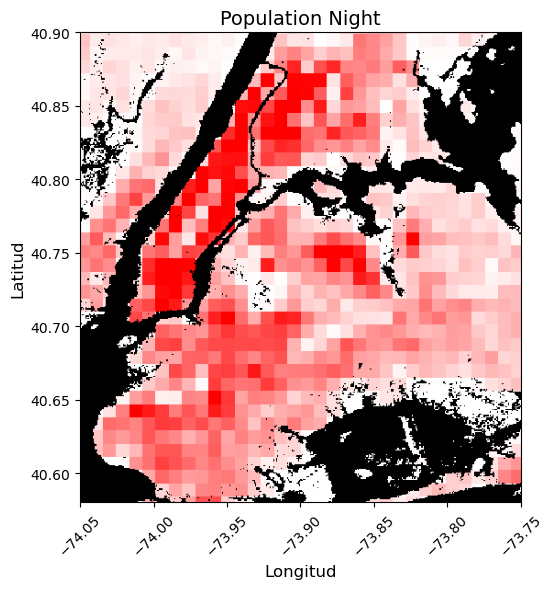

In [5]:
landScan_usa_night = Collection(
    source='projects/sat-io/open-datasets/ORNL/LANDSCAN_USA_NIGHT',
    start_date=t1_start,
    end_date=t2_ends,
    boundaries=region,
    reprojection={'crs': Landscan_projection, 'scale': 1000},
    reducer=ee.Reducer.sum().unweighted(),
    mask=mask,
)
landScan_usa_night.get_event(t3_start, t3_ends, 'landScan_t1',type='moisac')
landScan_usa_night.get_event(t2_start, t2_ends, 'landScan_t2',type='moisac')
landScan_usa_night.set_viz_params({'min': 0, 'max': 30000, 'unit': '-','value': 'People',
                   'palette': ['white', 'red']})

landScan_usa_night.plot_event('landScan_t1','Population Night', legend_label=False)
landScan_usa_night.plot_event('landScan_t2','Population Night', legend_label=False)


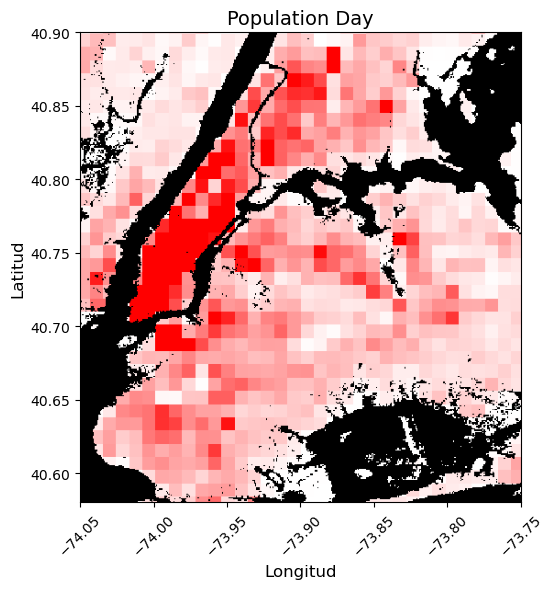

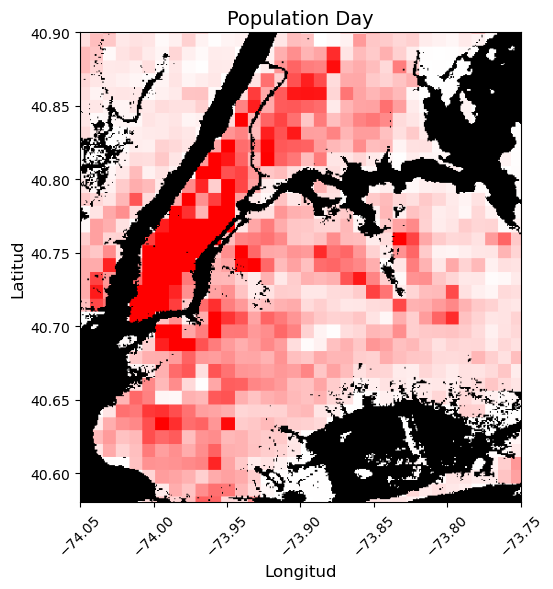

In [6]:
landScan_usa_day = Collection(
    source='projects/sat-io/open-datasets/ORNL/LANDSCAN_USA_DAY',
    start_date=t1_start,
    end_date=t2_ends,
    boundaries=region,
    reprojection={'crs': Landscan_projection, 'scale': 1000},
    reducer=ee.Reducer.sum().unweighted(),
    mask=mask,
)
landScan_usa_day.get_event(t3_start, t3_ends, 'landScan_t1', type='moisac')
landScan_usa_day.get_event(t2_start, t2_ends, 'landScan_t2', type='moisac')
landScan_usa_day.set_viz_params({'min': 0, 'max': 30000, 'unit': '-','value': 'People',
                   'palette': ['white', 'red']})

landScan_usa_day.plot_event('landScan_t1','Population Day', legend_label=False)
landScan_usa_day.plot_event('landScan_t2','Population Day', legend_label=False)


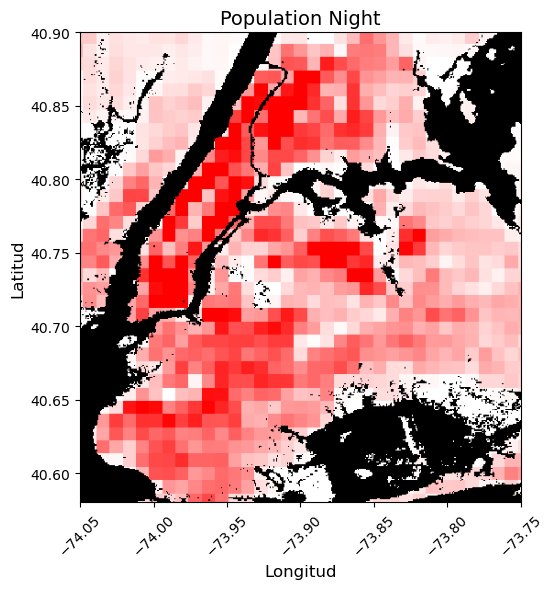

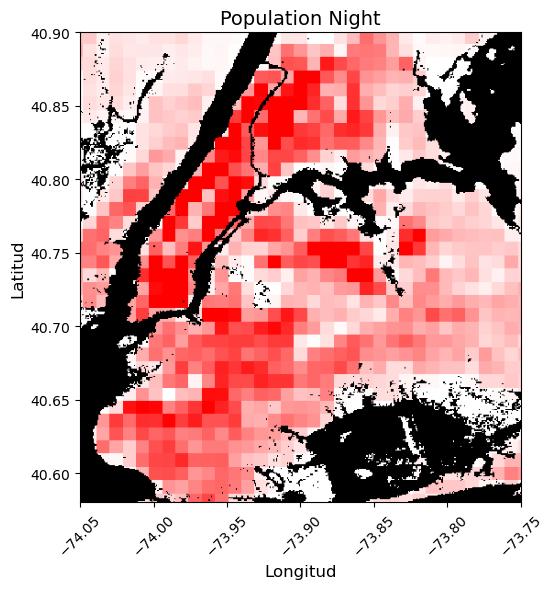

In [11]:
GHS = Collection(
    source='JRC/GHSL/P2023A/GHS_POP',
    # start_date=t1_start,
    # end_date=t2_ends,
    boundaries=region,
    mask=mask,
    reprojection={'crs': 'EPSG:4326', 'scale': 1000},
    reducer=ee.Reducer.sum().unweighted()
)
GHS.get_event(t1_start, t1_ends, 'GHS_t1', type='first')
GHS.get_event(t2_start, t2_ends, 'GHS_t2', type='first')
GHS.set_viz_params({'min': 0, 'max': 30000, 'unit': '-','value': 'People',
                   'palette': ['white', 'red']})
GHS.events['GHS_t1'].getInfo()
GHS.plot_event('GHS_t1','Population Night', legend_label=False)
GHS.plot_event('GHS_t2','Population Night', legend_label=False)


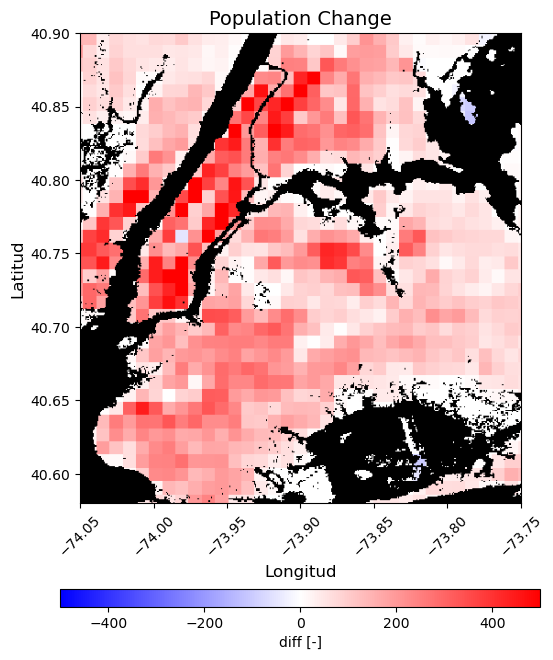

In [8]:
GHS.get_diff_event('GHS_t1','GHS_t2','GHS_diff')
GHS.set_viz_params({'min': -500, 'max': 500, 'unit': '-','value': 'diff',
                   'palette': [ 'blue','white', 'red' ]})
GHS.plot_event('GHS_diff','Population Change', legend_label=True)

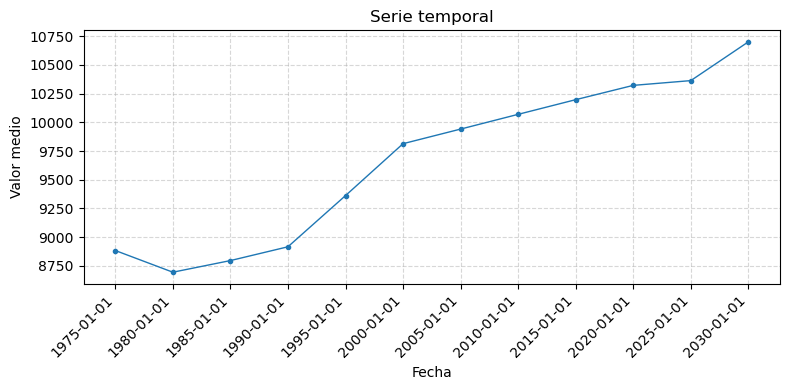

In [9]:
GHS.plot_timeseries()

In [10]:
ee.ImageCollection('JRC/GHSL/P2023A/GHS_POP').filterDate(None, 
                                                         None)